<a href="https://colab.research.google.com/github/Shi-raishi/Research/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Colabにlingamのライブラリをインストールする
# !pip install numpy
!pip install numpy==1.24.3
!pip install lingam

In [ ]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot
from lingam.utils import print_causal_directions, print_dagc
import matplotlib.pyplot as plt
import seaborn as sns

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

['1.24.3', '1.5.3', '0.20.1', '1.8.2']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/'Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%ls CSV

'BDHQ フォーマット LongDataSet (f_nutr1).csv'
'BDHQ フォーマット LongDataSet (nutr).csv'
'BDHQ フォーマット LongDataSet (signal).csv'
'BDHQ 児童生徒用フォーマット LongDataSet (food2).csv'
'BDHQ 成人用フォーマット LongDataSet (food).csv'
 Shift-JISに変換したもの/


In [ ]:
data_nutr = pd.read_csv('./CSV/BDHQ フォーマット LongDataSet (nutr).csv')
data_food = pd.read_csv('./CSV/BDHQ 成人用フォーマット LongDataSet (food).csv')
data_f_nutr1 = pd.read_csv('./CSV/BDHQ フォーマット LongDataSet (f_nutr1).csv')
data_signal = pd.read_csv('./CSV/BDHQ フォーマット LongDataSet (signal).csv')

無し：種実類、キノコ類、海藻類

In [ ]:
# BMI変数の追加


In [ ]:
# 'milk1'から'sake6'までの列を取得
selected_columns = data_food.loc[:, 'MILK1':'SAKE6']

In [ ]:
selected_columns.head()

,MILK1,MILK2,MEAT1,MEAT2,MEAT3,MEAT4,FISH1,FISH2,FISH3,FISH4,...,BEV4,BEV5,SGR,RICE,MISO,SAKE2,SAKE3,SAKE4,SAKE5,SAKE6
0,0.000000,136.111524,39.132063,39.132063,27.222305,3.387665,41.740867,5.843721,0.000000,72.592813,...,164.983665,82.491832,1.484853,300.270270,138.586279,0.0,0.0,9.642857,0.0,0.0
1,0.000000,0.000000,85.379047,85.379047,14.848530,0.000000,18.214197,13.660647,0.000000,15.838432,...,15.398475,0.000000,0.494951,720.648649,166.303534,0.0,0.0,96.428571,0.0,0.0
2,123.737749,123.737749,6.640593,35.574603,4.949510,0.000000,15.178497,0.000000,0.000000,0.000000,...,32.996733,32.996733,2.864116,405.364865,124.727651,0.0,0.0,9.642857,0.0,0.0
3,190.556133,12.703742,39.132063,39.132063,13.611152,0.000000,7.791629,5.843721,3.895814,6.775329,...,164.983665,32.996733,0.679733,300.270270,554.345114,0.0,0.0,19.285714,0.0,0.0
4,0.000000,207.879418,17.075809,42.689523,5.939412,0.000000,18.214197,13.660647,4.249979,15.838432,...,164.983665,230.977131,7.021705,165.148649,304.889813,0.0,0.0,13.500000,0.0,0.0


In [ ]:
selected_columns.isnull().sum()

MILK1    0
MILK2    0
MEAT1    0
MEAT2    0
MEAT3    0
MEAT4    0
FISH1    0
FISH2    0
FISH3    0
FISH4    0
FISH5    0
FISH6    0
EGG1     0
SOY1     0
SOY2     0
PTT1     0
VEG1     0
VEG2     0
VEG3     0
VEG4     0
VEG5     0
VEG6     0
VEG7     0
VEG8     0
VEG9     0
VEG10    0
VEG11    0
SWT1     0
SWT2     0
SWT3     0
SWT4     0
FRT1     0
FRT2     0
FRT3     0
MAYO1    0
CRL1     0
CRL2     0
CRL3     0
CRL4     0
CRL5     0
BEV1     0
BEV2     0
BEV3     0
BEV4     0
BEV5     0
SGR      0
RICE     0
MISO     0
SAKE2    0
SAKE3    0
SAKE4    0
SAKE5    0
SAKE6    0
dtype: int64

In [ ]:
selected_columns.describe()

,MILK1,MILK2,MEAT1,MEAT2,MEAT3,MEAT4,FISH1,FISH2,FISH3,FISH4,...,BEV4,BEV5,SGR,RICE,MISO,SAKE2,SAKE3,SAKE4,SAKE5,SAKE6
count,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,...,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000,2797.000000
mean,34.946548,79.717181,23.882089,34.351473,8.911210,0.898918,12.310823,10.169731,4.163770,22.377110,...,66.519737,48.318204,1.707683,298.265564,179.213582,15.638460,80.258833,16.187658,3.405779,4.237829
std,66.636545,86.132785,23.470234,26.686360,9.054864,3.166823,16.960061,17.570201,6.299947,24.178443,...,126.526757,98.191542,3.359991,158.917460,132.034126,54.309536,198.336855,44.184760,17.992201,22.390705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.968711,14.229841,2.309771,0.000000,5.520000,0.000000,0.000000,5.866667,...,0.000000,0.000000,0.000000,208.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,53.571429,15.652825,30.803571,5.142857,0.000000,7.083299,4.781227,3.066667,13.198693,...,15.398475,13.333333,0.000000,270.243243,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.857143,136.111524,33.883929,39.132063,11.785714,0.000000,14.457143,10.842857,5.914286,31.428571,...,82.491832,71.428571,1.979804,390.000000,249.455301,0.000000,63.300000,1.928571,0.000000,0.000000
max,415.758836,415.758836,239.061331,239.061331,83.151767,92.390852,254.998753,191.249064,82.800000,192.000000,...,923.908524,923.908524,33.260707,1441.297297,990.891892,540.000000,1899.000000,270.000000,201.000000,330.000000


In [ ]:
len(selected_columns)

2797

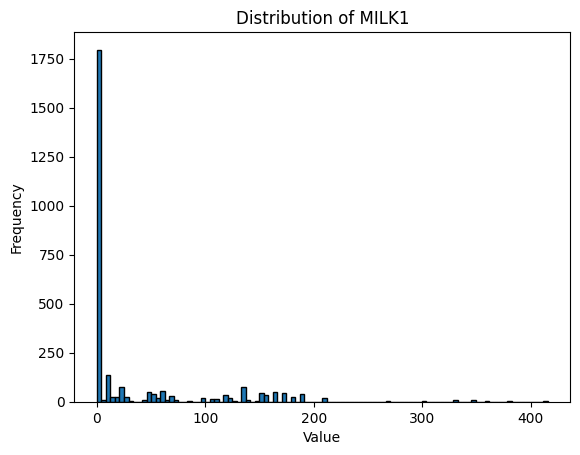

In [ ]:
# ヒストグラムを描画
plt.hist(selected_columns['MILK1'], bins=100, edgecolor='black')
plt.title('Distribution of MILK1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


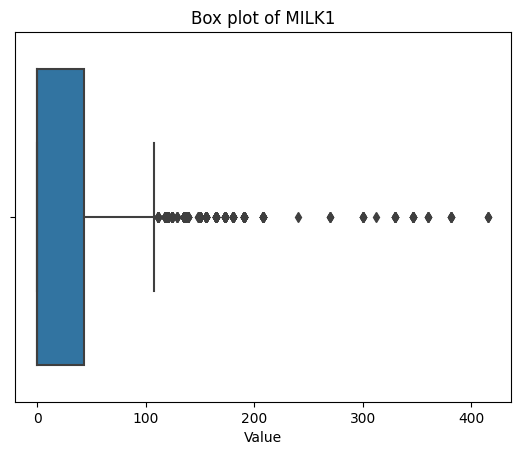

In [ ]:
# 箱ひげ図を描画
sns.boxplot(x=selected_columns['MILK1'])
plt.title('Box plot of MILK1')
plt.xlabel('Value')
plt.show()
